In [1]:
import numpy as np
import matplotlib.pyplot as plt

Ejercicio #1:

In [2]:
Vm = float(input("Ingrese el valor de la  velocidad de la moto: "))
Ap = float(input("Ingrese el valor de la  aceleracion del policia: "))
t=0
Xi=0
V0 = 0


Ingrese el valor de la  velocidad de la moto: 15
Ingrese el valor de la  aceleracion del policia: 3


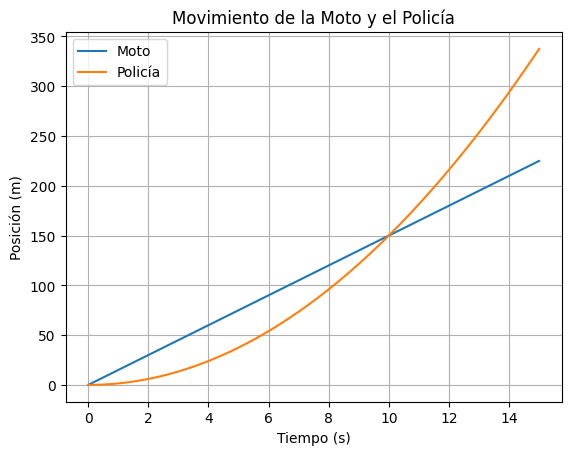

In [3]:
t = np.linspace(0, 15, 1000)
Xf1 = Xi + Vm * t       #Posicion moto
Xf2 = Xi + V0 * t + 1/2 * Ap * t**2     #Posicion policia

plt.plot(t, Xf1, label='Moto')
plt.plot(t, Xf2, label='Policía')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.title('Movimiento de la Moto y el Policía')
plt.legend()
plt.grid(True)

La moto y el policía se encuentran en t = 10.00 segundos


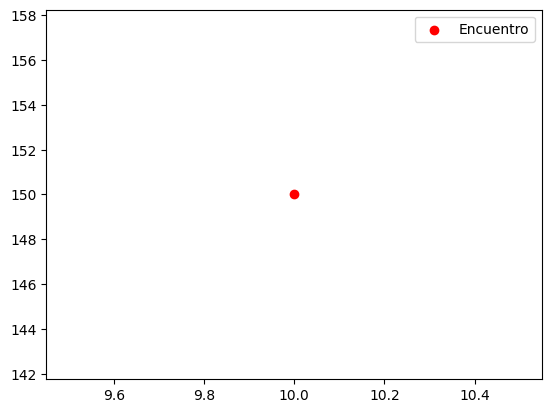

In [4]:
tiempodeencuentro = 2* Vm / Ap
print(f"La moto y el policía se encuentran en t = {tiempodeencuentro:.2f} segundos")
plt.scatter(tiempodeencuentro, Vm * tiempodeencuentro, color='red', marker='o', label='Encuentro')
plt.legend()
plt.show()

Ejercicio #2:

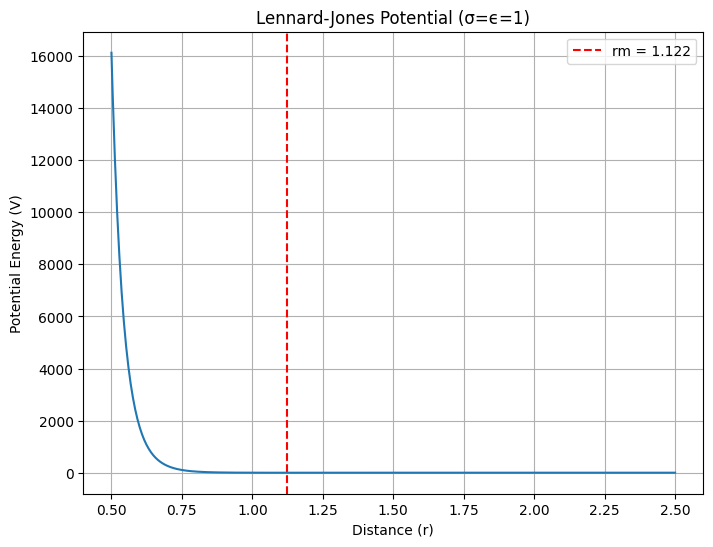

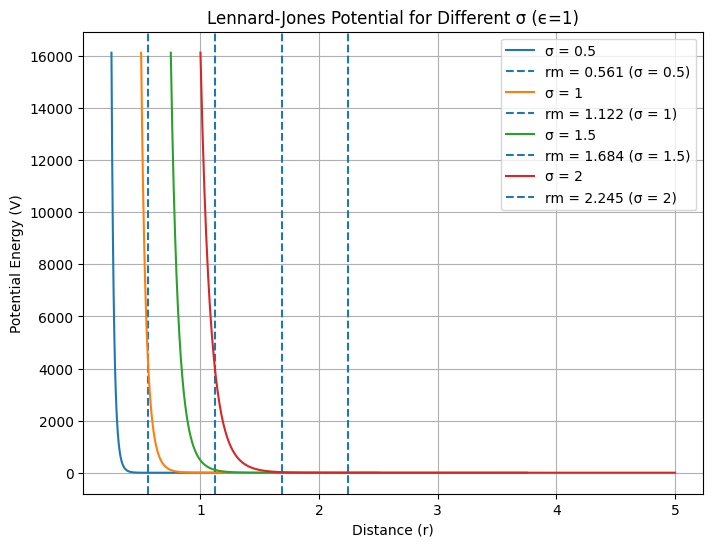

In [5]:
def LJpotencial(r, epsilon, sigma):
  return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)
#b
sigma = 1
epsilon = 1
r = np.linspace(0.5 * sigma, 2.5 * sigma, 500)
V = LJpotencial(r, epsilon, sigma)

plt.figure(figsize=(8, 6))
plt.plot(r, V)
plt.xlabel('Distance (r)')
plt.ylabel('Potential Energy (V)')
plt.title('Lennard-Jones Potential (σ=ϵ=1)')
plt.grid(True)

rm = 2**(1/6) * sigma
plt.axvline(rm, color='red', linestyle='--', label=f'rm = {rm:.3f}')
plt.legend()
plt.show()


#c
epsilon = 1
sigma_values = [0.5, 1, 1.5, 2]

plt.figure(figsize=(8, 6))

for sigma in sigma_values:
  r = np.linspace(0.5 * sigma, 2.5 * sigma, 500)
  V = LJpotencial(r, epsilon, sigma)
  plt.plot(r, V, label=f'σ = {sigma}')

  rm = 2**(1/6) * sigma
  plt.axvline(rm, linestyle='--', label=f'rm = {rm:.3f} (σ = {sigma})')

plt.xlabel('Distance (r)')
plt.ylabel('Potential Energy (V)')
plt.title('Lennard-Jones Potential for Different σ (ϵ=1)')
plt.legend()
plt.grid(True)
plt.show()


Ejercicio #3:

In [6]:
import pandas as pd

# Dataset 1
url1 = "https://worldpopulationreview.com/country-rankings/average-height-by-country"
html_content = pd.read_html(url1)
alturas = html_content[0]

print(alturas.columns)
alturas = alturas.drop(columns=["Boys 19 (in)", "Girls 19 (in)",'Unnamed: 0'])
alturas = alturas.rename(columns={
    "Country": "País",
    'Average Height, Boys, 19 yo (cm)↓': "Altura promedio hombres (cm)",
    'Girls 19 (cm)': "Altura promedio mujeres (cm)"

})
print(alturas.columns)

Index(['Unnamed: 0', 'Country', 'Average Height, Boys, 19 yo (cm)↓',
       'Girls 19 (cm)', 'Boys 19 (in)', 'Girls 19 (in)'],
      dtype='object')
Index(['País', 'Altura promedio hombres (cm)', 'Altura promedio mujeres (cm)'], dtype='object')


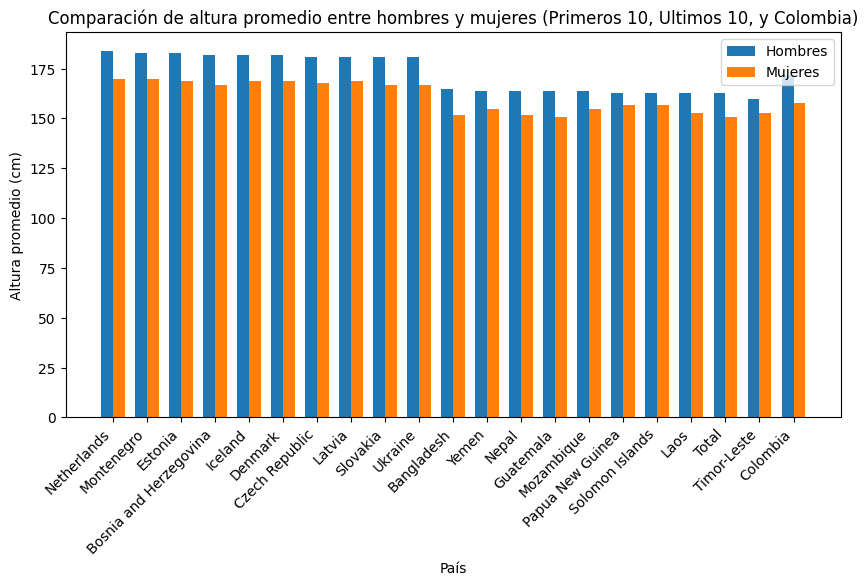

In [7]:
alturas_ordenado = alturas.sort_values('Altura promedio hombres (cm)', ascending=False)

primeros10 = alturas_ordenado.head(10)
ultimos10 = alturas_ordenado.tail(10)


colombia_data = alturas[alturas['País'] == 'Colombia']
if not colombia_data.empty:
    combined_data = pd.concat([primeros10, ultimos10, colombia_data])
else:
    print("Colombia no se encuentra en el dataset.")
    combined_data = pd.concat([primeros10, ultimos10])


plt.figure(figsize=(10, 5))

x = np.arange(len(combined_data))
width = 0.35


plt.bar(x - width/2, combined_data['Altura promedio hombres (cm)'], width, label='Hombres')
plt.bar(x + width/2, combined_data['Altura promedio mujeres (cm)'], width, label='Mujeres')



plt.xticks(x, combined_data['País'], rotation=45, ha="right")
plt.xlabel("País")
plt.ylabel("Altura promedio (cm)")
plt.title("Comparación de altura promedio entre hombres y mujeres (Primeros 10, Ultimos 10, y Colombia)")
plt.legend()
plt.show()


In [8]:
 ##### NO LOGRÉ HACER QUE EL COGIDO TOMARA EL NUEVO URL Y NO EL DEL DATASET 1
# Dataset 2
url2 = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"
print(alturas.columns)
html_content = pd.read_html(url2)
income = html_content[0]

merged_data = pd.merge(income, alturas, left_on='Country', right_on='País', how='inner')


primeros10gdp = merged_data.nlargest(10, 'Avg. Net Worth')
ultimos10gdp = merged_data.nsmallest(10, 'Avg. Net Worth')

alturaspromedioprimeros10 = primeros10gdp['Altura promedio hombres (cm)'].mean()
alturaspromedioultimos10 = ultimos10gdp['Altura promedio hombres (cm)'].mean()

gdp_valores = [primeros10gdp['Avg. Net Worth'].mean(), ultimos10gdp['Avg. Net Worth'].mean()]
alturaspromedio = [alturaspromedioprimeros10, alturaspromedioultimos10]

plt.figure(figsize=(8, 6))
plt.scatter(gdp_valores, alturaspromedio)
plt.xlabel("Average Net Worth")
plt.ylabel("Average Height (cm)")
plt.title("Relationship between Average Net Worth and Average Height")

for i, txt in enumerate(['Top 10 GDP', 'Bottom 10 GDP']):
    plt.annotate(txt, (gdp_valores[i], alturaspromedio[i]))

plt.grid(True)
plt.show()


Index(['País', 'Altura promedio hombres (cm)', 'Altura promedio mujeres (cm)'], dtype='object')


KeyError: 'Avg. Net Worth'